# Problem Statement : Loan Approval Prediction 

# Validates the customer eligibility for loan or not

## Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import pickle
import os

In [2]:
df = pd.read_csv("final-loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Exploratory Data Analysis

In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128835 entries, 0 to 128834
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Loan_ID            128835 non-null  object 
 1   Gender             126108 non-null  object 
 2   Married            128205 non-null  object 
 3   Dependents         125688 non-null  object 
 4   Education          128835 non-null  object 
 5   Self_Employed      122120 non-null  object 
 6   ApplicantIncome    128835 non-null  int64  
 7   CoapplicantIncome  128835 non-null  float64
 8   LoanAmount         124219 non-null  float64
 9   Loan_Amount_Term   125895 non-null  float64
 10  Credit_History     118342 non-null  float64
 11  Property_Area      128835 non-null  object 
 12  Loan_Status        128835 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 12.8+ MB


In [5]:
df["Loan_Status"].value_counts()

Y    88550
N    40285
Name: Loan_Status, dtype: int64

C:\Users\UmaM2\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

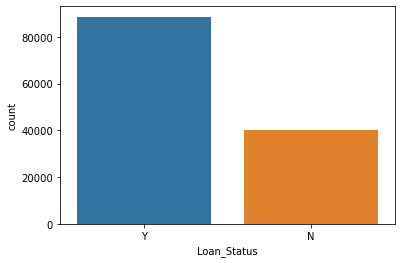

In [6]:
sns.countplot(df["Loan_Status"])

C:\Users\UmaM2\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

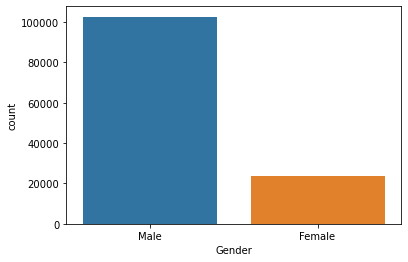

In [7]:
sns.countplot(df["Gender"])

In [8]:
df.isnull().sum()

Loan_ID                  0
Gender                2727
Married                630
Dependents            3147
Education                0
Self_Employed         6715
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount            4616
Loan_Amount_Term      2940
Credit_History       10493
Property_Area            0
Loan_Status              0
dtype: int64

In [9]:
(df.isnull().sum()/len(df))*100

Loan_ID              0.000000
Gender               2.116661
Married              0.488998
Dependents           2.442659
Education            0.000000
Self_Employed        5.212093
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.582877
Loan_Amount_Term     2.281989
Credit_History       8.144526
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [10]:
df["Loan_Amount_Term"].value_counts()

360.0    107430
180.0      9231
480.0      3148
300.0      2730
240.0       839
84.0        838
120.0       630
60.0        420
36.0        419
12.0        210
Name: Loan_Amount_Term, dtype: int64

In [11]:
df["Credit_History"].value_counts()

1.0    99669
0.0    18673
Name: Credit_History, dtype: int64

# Featured Engineering

## Handle Missing values

In [12]:
#Handle missing value for categorical features
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)

In [13]:
#Handle missing value for Numerical features
df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median(),inplace=True)

## Convert categorical data into the Numeric data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128835 entries, 0 to 128834
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Loan_ID            128835 non-null  object 
 1   Gender             128835 non-null  object 
 2   Married            128835 non-null  object 
 3   Dependents         128835 non-null  object 
 4   Education          128835 non-null  object 
 5   Self_Employed      128835 non-null  object 
 6   ApplicantIncome    128835 non-null  int64  
 7   CoapplicantIncome  128835 non-null  float64
 8   LoanAmount         128835 non-null  float64
 9   Loan_Amount_Term   128835 non-null  float64
 10  Credit_History     128835 non-null  float64
 11  Property_Area      128835 non-null  object 
 12  Loan_Status        128835 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 12.8+ MB


In [15]:
df["Gender"] = df["Gender"].map({"Male":1,"Female":0})
df["Married"] = df["Married"].map({"Yes":1,"No":0})
df["Dependents"] = df["Dependents"].map({"0":0,"1":1,"2":2,"3+":3})
df["Education"] = df["Education"].map({"Graduate":1,"Not Graduate":0})
df["Self_Employed"] = df["Self_Employed"].map({"No":0,"Yes":1})
df["Property_Area"] = df["Property_Area"].map({"Urban":0,"Semiurban":1,"Rural":3})

In [16]:
df["Loan_Status"] = df["Loan_Status"].map({"Y":1,"N":0})

In [17]:
df = df.drop("Loan_ID", axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,0,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,3,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1


## Split dataset into the training and testing

In [18]:
x = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3,random_state = 10, stratify = y)

In [20]:
len(x_train),len(y_train)

(90184, 90184)

In [21]:
len(x_test),len(y_test)

(38651, 38651)

## Model Training

In [22]:
class Evaluation():
    
    def __init__(self,model):
        self.model = model
    
    def train(self,x_train,y_train):
        y_train_pred = self.model.predict(x_train)
        accuracy_score_train= accuracy_score(y_train,y_train_pred)
        print("Accuracy Score : ",accuracy_score_train)
        print()

        confusion_matrix_train = confusion_matrix(y_train,y_train_pred)
        print("Confusion Matrix :\n ",confusion_matrix_train)
        print()

        classification_report_train = classification_report(y_train,y_train_pred)
        print("Classification Report :\n ",classification_report_train)
        
    def test(self,x_test,y_test):
        y_test_pred = self.model.predict(x_test)
        accuracy_score_test = accuracy_score(y_test,y_test_pred)
        print("Accuracy Score : ",accuracy_score_test)
        print()

        confusion_matrix_test= confusion_matrix(y_test,y_test_pred)
        print("Confusion Matrix :\n ",confusion_matrix_test)
        print()

        classification_report_test = classification_report(y_test,y_test_pred)
        print("Classification Report :\n ",classification_report_test)
        

### RandomForest Model Training

In [23]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

### RandomForest Model Evaluation

In [24]:
rf_evaluation = Evaluation(rf_model)

In [25]:
#Accuracy test on Training dataset
rf_evaluation.train(x_train,y_train)

Accuracy Score :  1.0

Confusion Matrix :
  [[28199     0]
 [    0 61985]]

Classification Report :
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     28199
           1       1.00      1.00      1.00     61985

    accuracy                           1.00     90184
   macro avg       1.00      1.00      1.00     90184
weighted avg       1.00      1.00      1.00     90184



In [26]:
#Accuracy test on Testing dataset
rf_evaluation.test(x_test,y_test)

Accuracy Score :  1.0

Confusion Matrix :
  [[12086     0]
 [    0 26565]]

Classification Report :
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     12086
           1       1.00      1.00      1.00     26565

    accuracy                           1.00     38651
   macro avg       1.00      1.00      1.00     38651
weighted avg       1.00      1.00      1.00     38651



### Logistic Regression Model Training

In [27]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

### Logistic Regression Model Evaluation

In [28]:
lr_evaluation = Evaluation(lr_model)

In [29]:
#Accuracy test on Training dataset
lr_evaluation.train(x_train,y_train)

Accuracy Score :  0.811219285017298

Confusion Matrix :
  [[12636 15563]
 [ 1462 60523]]

Classification Report :
                precision    recall  f1-score   support

           0       0.90      0.45      0.60     28199
           1       0.80      0.98      0.88     61985

    accuracy                           0.81     90184
   macro avg       0.85      0.71      0.74     90184
weighted avg       0.83      0.81      0.79     90184



In [30]:
#Accuracy test on Testing dataset
lr_evaluation.train(x_test,y_test)

Accuracy Score :  0.8052573025277483

Confusion Matrix :
  [[ 5196  6890]
 [  637 25928]]

Classification Report :
                precision    recall  f1-score   support

           0       0.89      0.43      0.58     12086
           1       0.79      0.98      0.87     26565

    accuracy                           0.81     38651
   macro avg       0.84      0.70      0.73     38651
weighted avg       0.82      0.81      0.78     38651



## Create Model Pickel File

In [31]:
pickle.dump(rf_model,open('loan_pred_model.pkl','wb'))

In [32]:
model = pickle.load(open('loan_pred_model.pkl',"rb"))

In [33]:
model.predict(x.loc[100:100,:])

array([1], dtype=int64)